<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span><ul class="toc-item"><li><span><a href="#Problem-statement" data-toc-modified-id="Problem-statement-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Problem statement</a></span></li><li><span><a href="#Motivation-and-Applications" data-toc-modified-id="Motivation-and-Applications-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Motivation and Applications</a></span></li><li><span><a href="#Why-Transfer-Learning" data-toc-modified-id="Why-Transfer-Learning-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Why Transfer Learning</a></span></li></ul></li><li><span><a href="#Background" data-toc-modified-id="Background-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Background</a></span><ul class="toc-item"><li><span><a href="#What-is-a-Neural-Network" data-toc-modified-id="What-is-a-Neural-Network-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>What is a Neural Network</a></span></li><li><span><a href="#What-is-Transfer-Learning" data-toc-modified-id="What-is-Transfer-Learning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>What is Transfer Learning</a></span></li></ul></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Installing-TensorFlow-and-Object-Detection-API" data-toc-modified-id="Installing-TensorFlow-and-Object-Detection-API-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Installing TensorFlow and Object Detection API</a></span></li><li><span><a href="#Preparing-the-Data" data-toc-modified-id="Preparing-the-Data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Preparing the Data</a></span><ul class="toc-item"><li><span><a href="#Extract-Images-from-Video" data-toc-modified-id="Extract-Images-from-Video-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Extract Images from Video</a></span></li><li><span><a href="#Create-CSV-files-for-training/testing" data-toc-modified-id="Create-CSV-files-for-training/testing-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Create CSV files for training/testing</a></span></li><li><span><a href="#Convert-CSV-to-TFR-Format" data-toc-modified-id="Convert-CSV-to-TFR-Format-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Convert CSV to TFR Format</a></span></li></ul></li><li><span><a href="#Training-the-Model" data-toc-modified-id="Training-the-Model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Training the Model</a></span><ul class="toc-item"><li><span><a href="#Preparing-the-environment" data-toc-modified-id="Preparing-the-environment-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Preparing the environment</a></span></li></ul></li></ul></li><li><span><a href="#part-2" data-toc-modified-id="part-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>part 2</a></span></li></ul></div>

# Overview

## Problem statement

<p>My goal in this series is to deploy a neural network capable of identifying and localizing pedestrians in an image (the combination of image classification and localization is called object detection). In the first part of the series I will do this by downloading a pretrained model and using transfer learning to fine tune it for my problem. In the second part, I will try to create and deploy a model from scratch.</p>

## Motivation and Applications

<p>My main motivation for this project was simply to gain an understanding of deep learning, a field I knew nothing about prior to this project. Furthermore, object detection problems tend to involve much deeper networks than object classification, and the concepts involved here are highly transferable across other deep learning domains. </p>
<p>Of course, object detection has some pretty cool applications in its own right. For example, security companies build on top of object detection models to do things like gait analysis and tracking people across multiple cameras. Self-driving cars need to be able to perform object detection to avoid hitting pedestrians and other cars. And one could imagine lots of fun home applications for object detection.</p>

## Why Transfer Learning

Practically speaking, you will almost always use transfer learning when dealing with neural network. The reason for this is twofold:
1. Using a pretrained model drastically cuts down the amount of resources needed to fine tune a network. By using a pretrained model you will require fewer training samples and less computing time for a comparable level of accuracy.
2. It is unlikely that you will be creating a deep learning model that is completely new. Most new models are really variations of existing models, so it makes sense to take advantage of existing work
Consequently, transfer learning is one of the most important skills you can have with respect to deep learning

# Background

## What is a Neural Network

To understand what a neural network is, we can break the concept down into two components, structure and learning. 

**Structure**: Although different model types can have additional components, all neural networks have an input layer, some number of hidden layers, and an output layer, as seen in the picture bellow.



The layers in turn are made up of nodes called neurons. All a neuron is is a container that holds a single number. 

Breaking things down, the neurons in the input layer correspond to the data points we are analyzing. For example, if we are analyzing a picture, the input layer neurons correspond to the pixel values of that picture. Each neuron is then multiplied by some value, called a weight, and added together to produce a new value, which will become a neuron for the first hidden layer. So each neuron is the result of a different linear transformation on the previous layer. The neurons then undergo a non-linear transformation, called an activation function. For example, a common activation function is to map positive values to themselves and negative values to 0. The whole point of the activation function is to make our system capable of solving non-linear systems. This process is then repeated for each hidden layer, until we get to the output layer. The output layer represents the data we want. For example, if we have a dog classifier, the output layer would be 0 for "no dog" and 1 for "dog".

To help visualize the process outlined, you can look at this simplified neural network:
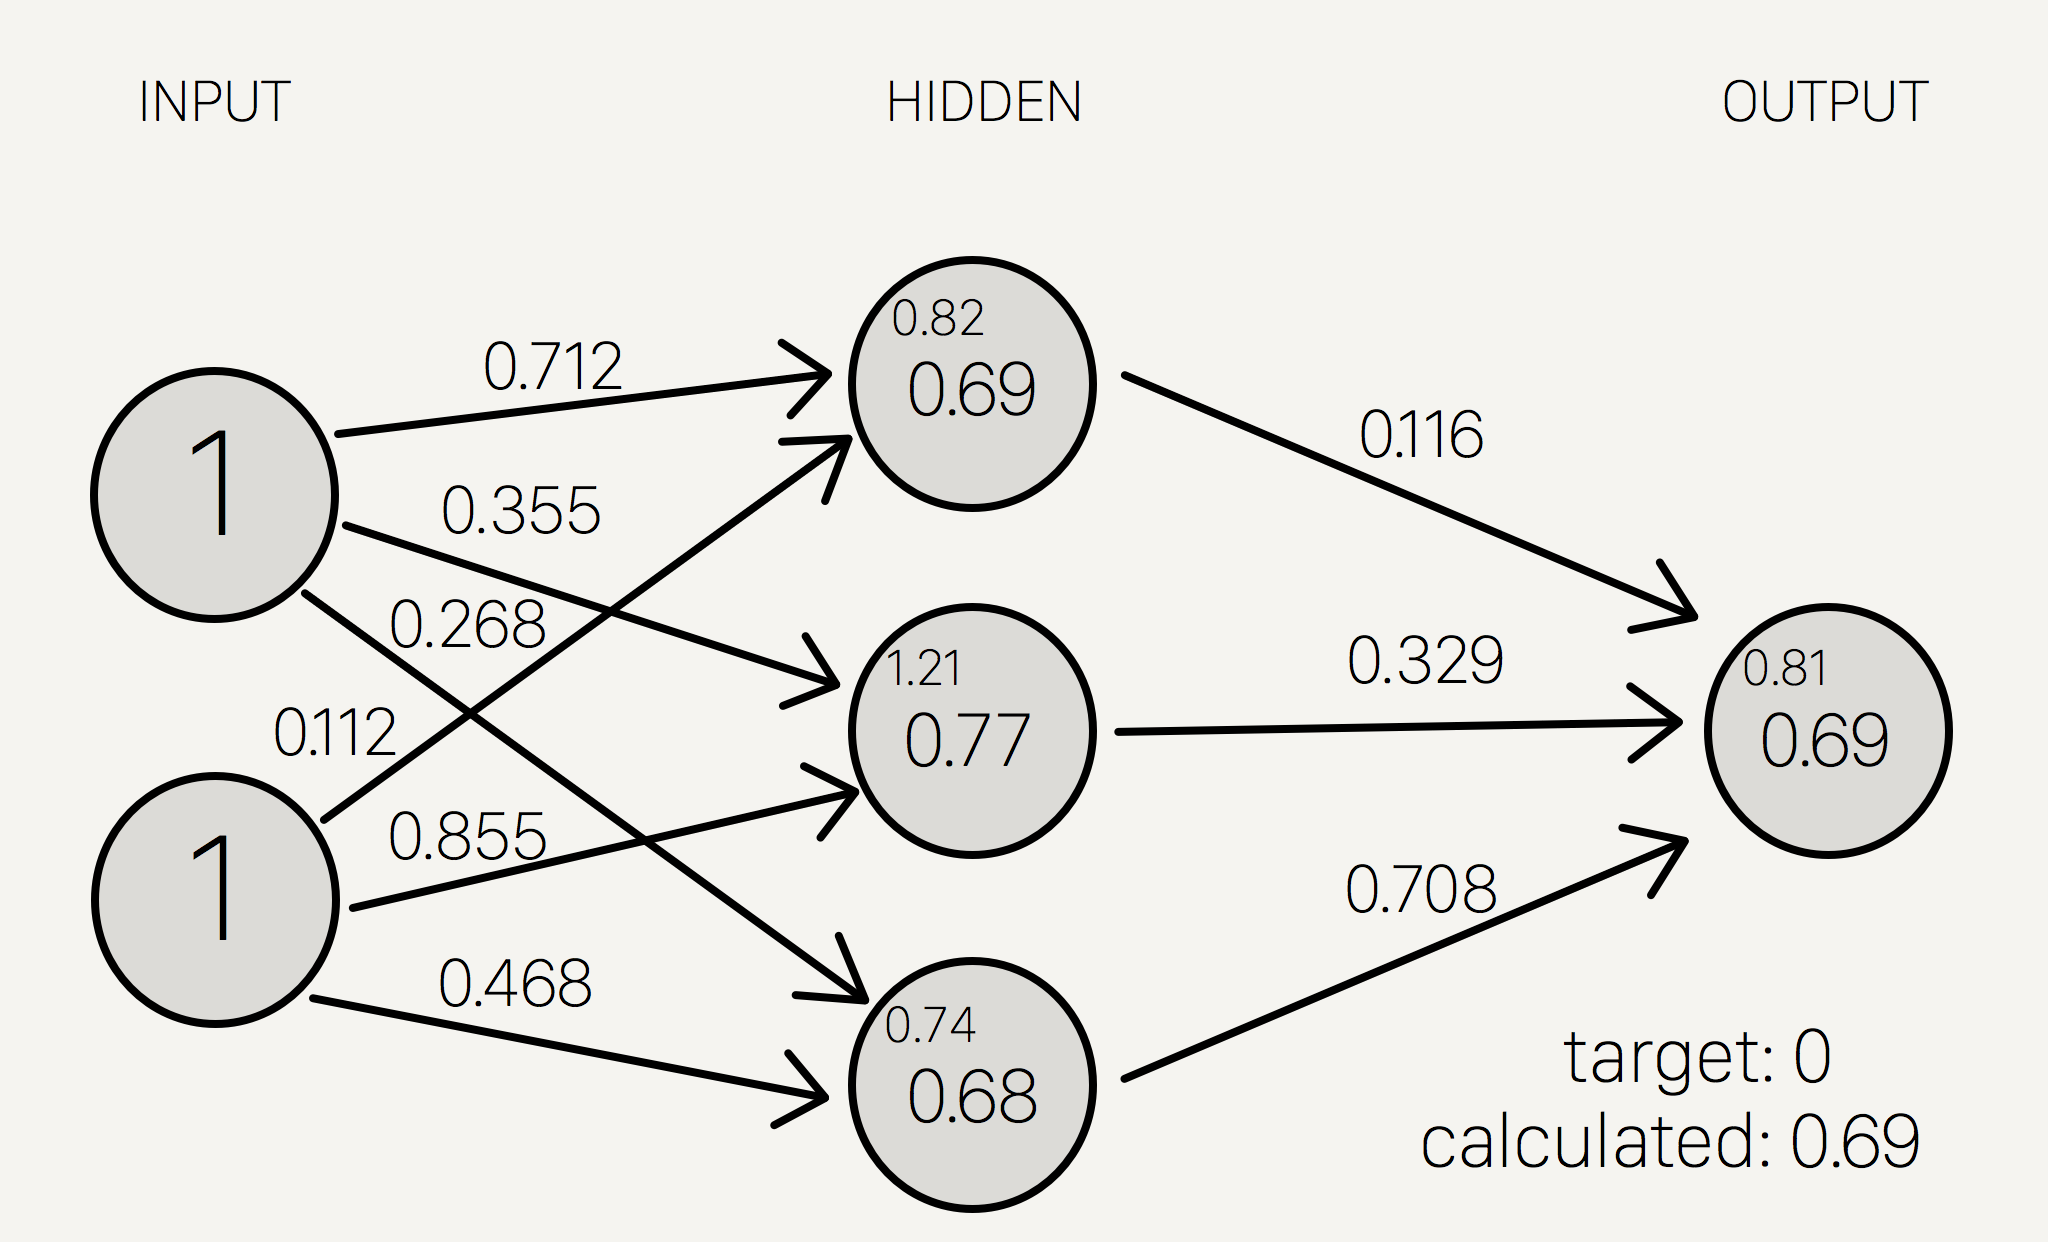


The initial neurons are (1,1) and the first transform is (0.712, 0.0112), so the initial value of the first neuron of the hidden layer is 
$$(1,1)*(0.712, 0.0112)= 0.712+0.0112 = 0.824 $$
That value is then placed through the activation function. In this case, the activation function is called the Sigmoid function, $S(x)= \frac{1}{e^{-x}}$ so as a final value we get:
$$S(0.824) = 0.69$$
That process is then repeated for every neuron in the first layer of the model. Then to get our output layer of one neuron, we put the hidden layer (0.69, 0.77, 0.68) and apply the transform (0.116, 0.329, 0.708) to get the output value of 0.69.

Now that you know how neural networks are structured, you're probably wondering why they are structured this way, since it just looks like a lot of wheel spinning on the surface. Again, we will break this down into parts, but the main benefit of this structure is that it allows us to model complex interactions within our data. Starting from the input layer, the weights allow all of our data to interact with each other. Some weights will be higher, which means some of the input data will dominate the neuron it's mapped to, and some of the weights may even be 0, meaning that some data won't have any effect on that neuron. Therefore each neuron actually represents some interaction in the data, i.e. a neuron is a feature that we would have to specifically program in a supervised learning model. The cool thing is that each additional layer allows the features from the previous layer to interact with one another to create another feature in the next hidden layer. As a concrete example, we may input an image, and the first layer may extract distinct edges from that image, and the next layer may extract distinct shapes. Finally, the activation function serves two purposes, it allows the model to capture non-linearity, and it bounds the possible value of the neurons, which is useful for training.

**Training**: While there is a lot of mysticism surrounding deep learning models in pop-sci, you can really just think of neural networks as non-linear, differential optimization problems. Like any other model, you have inputs, outputs, and targets and you want the model to produce outputs as close to the targets as possible (for whatever metric of closeness you have defined). In the case of a neural network, once the structure is locked in, the only way to change the outputs is to change the value of the weights in each layer. This is done through gradient decent.

## What is Transfer Learning

Transfer learning is essentially repurposing an an existing deep learning model for a new but similar task. 

To understand when and why transfer learning is effective, remember that the layers in a trained model represent features that the model has learned to extract. Furthermore, the features extracted tend to become more particular to the problem as we go into deeper layers. For example, an animal classifier may have a layer that extracts basic shapes from the image, another layer that recognizes textures, and so on. As you can see from the example, the features a model learns to extract are often useful for similar tasks. So if we wanted to create a face detector, we could start from randomized layers and see which features emerged from our model. Or we could take advantage of the fact that the features extracted by our first model are useful for other image classification tasks, and use that as a starting point rather than reinvent the wheel.

A slightly more technical way of looking at transfer learning is from an optimization perspective. Remember, a neural network is composed of layers of weights that transform the data in each layer. And when we train a model, we are moving those weights to a more optimal value through gradient descent. When we use a new model, those weights' values are completely random to start. However, if we assume similar input and output, then the weights of our pretrained model are likely closer to their optimum values than completely random weights. So our pretrained model requires less adjustment (training steps) to be optimized.

We can break down
transfer learning into the following steps:
1. download a model that has already been trained on a dataset
2. make whatever adjustments you want to test on the model (e.g. adjust the learning rate)
3. strip last layers of the existing model and replace them with randomized layers
4. fine-tune layers on new data
5. Verify Results




# Modeling

Here I will go through the steps I went through to get my model up and running, from installing tensor flow, to preparing the data, to training the model

## Installing TensorFlow and Object Detection API

To start, I highly recommend creating a virtual environment either through Anaconda or Python environments to help manage version requirements. Within your environment install the necessary packages.

In [ ]:
pip install tensorflow
pip install Cython
pip install pillow
pip install lxml
pip install jupyter
pip install matplotlib

Then to install the Object Detection API, you need to download the tensorflow models repo by running the following command on your terminal

In [ ]:
git clone https://github.com/tensorflow/models.git

Then on the terminal CD into tensorflow/models/research/ and compile protobuf by running

In [ ]:
# From tensorflow/models/research/
protoc object_detection/protos/*.proto --python_out=.

Finally, add the libraries to your pythonpath by running:

In [ ]:
# From tensorflow/models/research/
export PYTHONPATH=$PYTHONPATH:`pwd`:`pwd`/slim

every time you open a new terminal window

## Preparing the Data

<p>The data I am using comes from https://www.kaggle.com/smeschke/pedestrian-dataset#crosswalk.csv. It consists of 3 videos of pedestrians using crosswalks in different situations as well as CSV files for each video which give the bounding box information for the pedestrians in the video in the following format, (x, y, height, width).</p>
<p>My goal in this section is to break down each video into its component frames in jpg format. I then need to create a data frame which contains the following columns: file path, width, height, class, xmin, xmax, ymin, ymax</p>
<p>It is also worth noting that all of the models in the object detection API are size agnostic. They perform all necessary image padding and scaling for you. However, I will go over how to do data standardization and augmentation in the next post.</p>

### Extract Images from Video

Because the data comes as video files, I will use cv2 to read it and capture frames. The code bellow carries out the following steps:

1. Gets a list of videos in the data directories
2. Defines a function which
    1. reads a video file
    2. creates a directory named after the video if none exists
    3. captures a frame and saves it as a jpeg to the directory
3. applies the function to all files in the list

In [4]:
import cv2
import pandas as pd
import numpy as np
import os
import tensorflow as tf

In [5]:
#get list of video files
dataPath = 'data/'
dataFiles = os.listdir(dataPath)
videoFiles = [dataPath+file for file in dataFiles if file.endswith('.avi')]

In [2]:
#define function to turn video into images
def frame_capture(path): 
    
    cap = cv2.VideoCapture(path) 
    currentFrame = 0
    directory = path.strip('.avi')
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory of data')
    # checks whether frames were extracted 
    success = 1

    while success:
        # Capture frame-by-frame
        success, frame = cap.read()

        # Saves image of the current frame in jpg file
        name = directory + '/frame' + str(currentFrame) + '.jpg'
        cv2.imwrite(name, frame)

        # To stop duplicate images
        currentFrame += 1

    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()
  

In [ ]:
#turn each video file into a directory of image files
for file in videoFiles:
    frame_capture(file)

### Create CSV files for training/testing

Now that I have my images, I need to combine my image file paths with my bounding box data in the format required by the object detection API. I also need to split my data into a training set and testing set.

In [4]:
boundingBoxFiles = ['data/night.csv', 'data/fourway.csv', 'data/crosswalk.csv']    

In [5]:
#Reformat CSV data into required format
pedestrian_labels = pd.DataFrame()
for file in boundingBoxFiles:
    name = file.replace('/','.').split('.')[1]
    df = pd.read_csv(file)
    new_df = pd.DataFrame()
    #create columns for new dataframe
    new_df['filename'] = df.index.astype(str)
    new_df['filename'] = 'data/'+ name+ '/frame'+ new_df['filename']+ '.jpg'
    new_df['width'] = df.w
    new_df['height'] = df.h
    new_df['class'] = 'pedestrian'
    new_df['xmin'] = df.x
    new_df['ymin'] = df.y-df.h
    new_df['xmax'] = df.x + df.w
    new_df['ymax'] = df.y
    #store to central data frame
    pedestrian_labels = pedestrian_labels.append(new_df)

In [11]:
#split data into training and testing set, then save file
train_labels = pedestrian_labels.sample(frac=0.8,random_state=17)
test_labels = pedestrian_labels.drop(train_labels.index)
pedestrian_labels.to_csv('data/pedestrian_labels.csv', index=False)
train_labels.to_csv('data/train_labels.csv', index=False)
test_labels.to_csv('data/test_labels.csv', index=False)

In [10]:
#check to make sure data is in correct format
train_labels.head()
test_labels.head()

,filename,width,height,class,xmin,ymin,xmax,ymax
118,data/night/frame118.jpg,156,312,pedestrian,1631,161,1787,473
400,data/night/frame400.jpg,172,345,pedestrian,1199,139,1371,484
439,data/night/frame439.jpg,145,291,pedestrian,1040,179,1185,470
452,data/night/frame452.jpg,143,286,pedestrian,966,183,1109,469
455,data/night/frame455.jpg,141,283,pedestrian,946,183,1087,466


### Convert CSV to TFR Format

In order to use the models, tensorflow requires you to have your data in TFRecord format. Luckily, the object detection API has a script for converting the CSV files created in the previous step to TFR files. The script is called "generate_tfrecord.py" and it is located under the file path "TensorFlow/models/research/object_detection/legacy". But I'll include the code bellow so you can just copy and paste. I will also give a link to a video which does a good job of explaining the TFRecord format and how to use it.
https://www.youtube.com/watch?v=oxrcZ9uUblI

In [ ]:
"""
Usage:

# Create train data:
python generate_tfrecord.py --label=<LABEL> --csv_input=<PATH_TO_ANNOTATIONS_FOLDER>/train_labels.csv  --output_path=<PATH_TO_ANNOTATIONS_FOLDER>/train.record

# Create test data:
python generate_tfrecord.py --label=<LABEL> --csv_input=<PATH_TO_ANNOTATIONS_FOLDER>/test_labels.csv  --output_path=<PATH_TO_ANNOTATIONS_FOLDER>/test.record
"""

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import

import os
import io
import pandas as pd
import tensorflow as tf

from PIL import Image
from object_detection.utils import dataset_util
from collections import namedtuple, OrderedDict

flags = tf.app.flags
flags.DEFINE_string('csv_input', '', 'Path to the CSV input')
flags.DEFINE_string('output_path', '', 'Path to output TFRecord')
flags.DEFINE_string('label', '', 'Name of class label')
FLAGS = flags.FLAGS


# TO-DO replace this with label map
def class_text_to_int(row_label):
    if row_label == FLAGS.label:  # 'ship':
        return 1
    else:
        None


def split(df, group):
    data = namedtuple('data', ['filename', 'object'])
    gb = df.groupby(group)
    return [data(filename, gb.get_group(x)) for filename, x in zip(gb.groups.keys(), gb.groups)]


def create_tf_example(group, path):
    with tf.gfile.GFile(os.path.join(path, '{}'.format(group.filename)), 'rb') as fid:
        encoded_jpg = fid.read()
    encoded_jpg_io = io.BytesIO(encoded_jpg)
    image = Image.open(encoded_jpg_io)
    width, height = image.size

    filename = group.filename.encode('utf8')
    image_format = b'jpg'
    xmins = []
    xmaxs = []
    ymins = []
    ymaxs = []
    classes_text = []
    classes = []

    for index, row in group.object.iterrows():
        xmins.append(row['xmin'] / width)
        xmaxs.append(row['xmax'] / width)
        ymins.append(row['ymin'] / height)
        ymaxs.append(row['ymax'] / height)
        classes_text.append(row['class'].encode('utf8'))
        classes.append(class_text_to_int(row['class']))

    tf_example = tf.train.Example(features=tf.train.Features(feature={
        'image/height': dataset_util.int64_feature(height),
        'image/width': dataset_util.int64_feature(width),
        'image/filename': dataset_util.bytes_feature(filename),
        'image/source_id': dataset_util.bytes_feature(filename),
        'image/encoded': dataset_util.bytes_feature(encoded_jpg),
        'image/format': dataset_util.bytes_feature(image_format),
        'image/object/bbox/xmin': dataset_util.float_list_feature(xmins),
        'image/object/bbox/xmax': dataset_util.float_list_feature(xmaxs),
        'image/object/bbox/ymin': dataset_util.float_list_feature(ymins),
        'image/object/bbox/ymax': dataset_util.float_list_feature(ymaxs),
        'image/object/class/text': dataset_util.bytes_list_feature(classes_text),
        'image/object/class/label': dataset_util.int64_list_feature(classes),
    }))
    return tf_example


def main(_):
    writer = tf.python_io.TFRecordWriter(FLAGS.output_path)
    path = os.path.join(os.getcwd(), '')
    examples = pd.read_csv(FLAGS.csv_input)
    grouped = split(examples, 'filename')
    for group in grouped:
        tf_example = create_tf_example(group, path)
        writer.write(tf_example.SerializeToString())

    writer.close()
    output_path = os.path.join(os.getcwd(), FLAGS.output_path)
    print('Successfully created the TFRecords: {}'.format(output_path))


if __name__ == '__main__':
    tf.app.run()

Once you have the above code in your working directory named as `generate_tfrecord.py`, you can convert the csv files by running the following code:

In [ ]:
python generate_tfrecord.py --label=pedestrian --csv_input=data/train_labels.csv --output_path=data/train.record 
python generate_tfrecord.py --label=pedestrian --csv_input=data/test_labels.csv --output_path=data/test.record 

## Training the Model

### Preparing the environment

# part 2